In [19]:
# imports needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [30]:
# import training dataset
data = pd.read_csv("../datasets/train.csv")

# Read the DataFrame, first using the feature data
features = ["CPSC_Case_Number", "Age", "Sex",	"Race",	"Body_Part", "Diagnosis",	
    "Disposition", "Location", "Fire_Involvement", "Product_1", "Product_2", 
    "PSU",	"Weight"]
df = pd.DataFrame(data, columns=features)
del data

In [31]:
df.dtypes

CPSC_Case_Number    float64
Age                   int64
Sex                   int64
Race                float64
Body_Part           float64
Diagnosis           float64
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
PSU                 float64
Weight              float64
dtype: object

In [32]:
df = df.astype('float64')
df.dtypes

CPSC_Case_Number    float64
Age                 float64
Sex                 float64
Race                float64
Body_Part           float64
Diagnosis           float64
Disposition         float64
Location            float64
Fire_Involvement    float64
Product_1           float64
Product_2           float64
PSU                 float64
Weight              float64
dtype: object

In [33]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# [0] signifies the index of the column we are appliying the encoding on
df = pd.DataFrame(ct.fit_transform(df).astype(str))
df.head()

,0
0,"(0, 603693)\t1.0\n (0, 702545)\t25.0\n (0,..."
1,"(0, 504913)\t1.0\n (0, 702545)\t70.0\n (0,..."
2,"(0, 375401)\t1.0\n (0, 702545)\t18.0\n (0,..."
3,"(0, 311461)\t1.0\n (0, 702545)\t17.0\n (0,..."
4,"(0, 580479)\t1.0\n (0, 702545)\t27.0\n (0,..."


In [34]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df))
data

ValueError: setting an array element with a sequence.

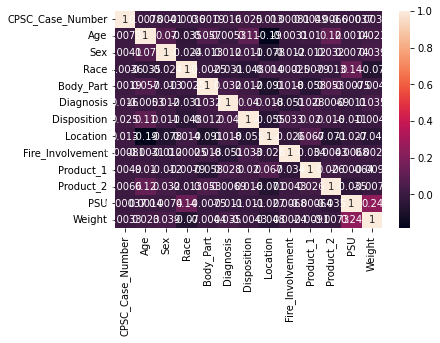

In [ ]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()
correlation_mat.to_csv('../outputs/correlation-matrix.csv')

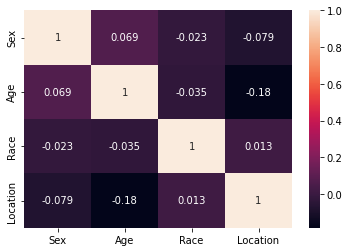

In [ ]:
df_specific = df[['Sex', 'Age', 'Race', 'Location']]
correlation_mat = df_specific.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()